In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
df= pd.read_csv("Real-Time_Traffic_Incident_Reports_20250818.csv", low_memory=False)

In [2]:
df['Published Date'] = pd.to_datetime(df['Published Date'], errors='coerce') # Convert to a datetime variable 


In [3]:
df['Month']= df['Published Date'].dt.month

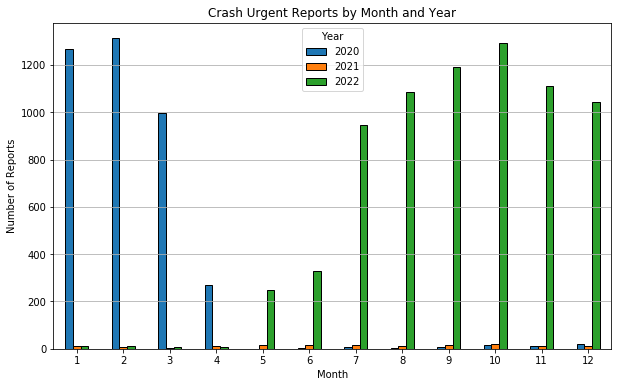

In [5]:
# Filter
crash_df = df[df['Issue Reported'] == 'Crash Urgent'].copy()
crash_df["Year"] = crash_df["Published Date"].dt.year
crash_df["Month"] = crash_df["Published Date"].dt.month

crash_df = crash_df[crash_df["Year"].isin([2020,2021,2022])] # Years of study


# Grouping
monthly_crashes = crash_df.groupby(["Year", "Month"]).size().unstack(level=0) # Month and year series

# Graph
monthly_crashes.plot(kind="bar", figsize=(10,6), edgecolor="black")

plt.title("Crash Urgent Reports by Month and Year")
plt.xlabel("Month")
plt.ylabel("Number of Reports")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.legend(title="Year")
plt.show()